In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.sample(5)

,Age,Fare,Family,Survived
362,45.0,14.4542,1,0
108,38.0,7.8958,0,0
580,25.0,30.0000,2,1
746,16.0,20.2500,2,0
463,48.0,13.0000,0,0


In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.shape 

(891, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [8]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [9]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [10]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [12]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [13]:
x_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [14]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()


mean_fare =  x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [15]:
mean_age
median_age
mean_fare
median_fare

14.4583

In [16]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)


x_train['fare_median'] = x_train['Fare'].fillna(median_age)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_age)

In [17]:
x_train.head()

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458


In [18]:
median_fare

14.4583

In [19]:
x_train['fare_median'].values

array([ 27.7208,  16.7   ,   9.    ,  31.3875,   9.8458,  13.    ,
         8.05  ,   7.2292,  26.3875,   8.05  ,  10.5   ,  71.2833,
         7.8542,   9.5   ,  91.0792,  52.5542,   9.8417,   8.05  ,
        26.    ,   7.75  ,  76.7292,  13.    ,  27.    ,  30.6958,
        26.    , 133.65  ,  46.9   ,   6.4958,  27.7208,   6.45  ,
        31.275 ,  28.7125,  26.55  ,  28.75  ,  21.075 ,  31.275 ,
        53.1   ,  69.55  ,  23.25  ,  29.7   ,   7.65  ,   7.8958,
        26.    ,   7.75  ,  13.    ,   6.975 ,   8.05  ,  83.475 ,
         7.75  ,  86.5   ,   8.6625,  14.4542,  53.1   ,  12.35  ,
        13.    ,  10.5   ,  50.4958,   7.2292,  12.35  ,  13.5   ,
        69.3   ,   0.    ,  13.    ,  76.7292, 512.3292,  10.5   ,
        73.5   ,   7.925 ,   8.85  ,  13.    , 164.8667,   7.75  ,
         8.05  ,  26.25  ,  24.    ,   9.5   ,   7.775 ,   8.05  ,
         8.05  ,   7.8958,  16.7   ,  26.    ,  15.05  ,   7.8958,
        31.    ,  52.    ,   8.05  ,   7.8958,   7.8542,  19.9

In [20]:
print('Original Age variable variance :,',x_train['Age'].var())
print('Age variance after median imputation ',x_train['Age_median'].var())
print('Age variance after mean imputation',x_train['Age_mean'].var())


print("Original fare variable variance",x_train['Fare'].var())
print('fare variance after median imputation ',x_train['fare_median'].var())
print('fare variance after mean imputation',x_train['fare_mean'].var())

Original Age variable variance :, 204.3495133904614
Age variance after median imputation  161.9895663346054
Age variance after mean imputation 161.81262452718673
Original fare variable variance 2448.197913706318
fare variance after median imputation  2324.9576136149317
fare variance after mean imputation 2324.623996772905


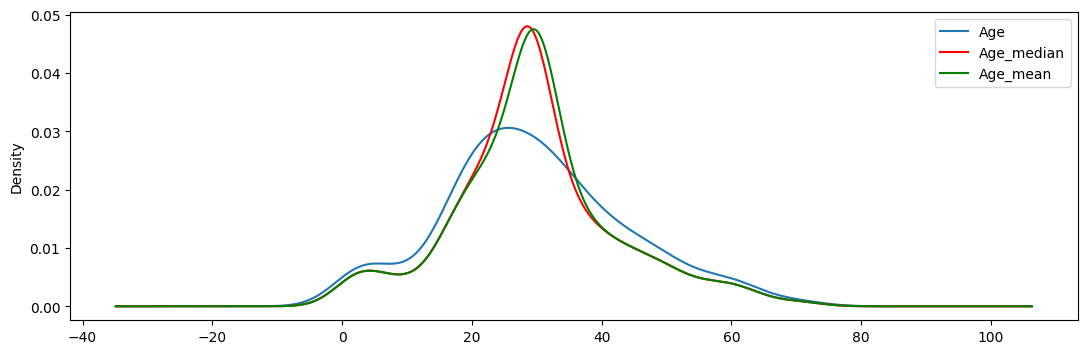

In [21]:
fig = plt.figure(figsize = (13,4))
ax = fig.add_subplot(111)

# original variable distribution 
x_train['Age'].plot(kind = 'kde',ax =ax)

# variable imputed with the median 
x_train['Age_median'].plot(kind = 'kde',ax=ax,color='red')

# variable imputed with the mean 
x_train['Age_mean'].plot(kind = 'kde',ax = ax,color = 'green')

# add legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

plt.show()

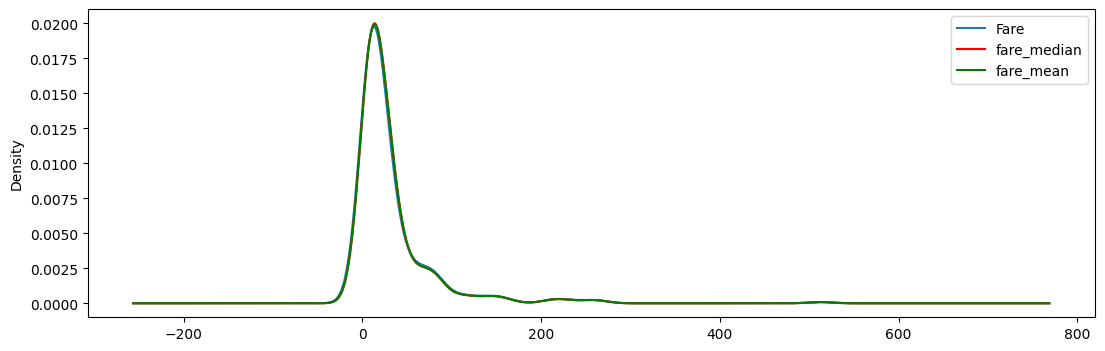

In [22]:
fig = plt.figure(figsize = (13,4))
ax = fig.add_subplot(111)

# original variable distribution 
x_train['Fare'].plot(kind = 'kde',ax =ax)

# variable imputed with the median 
x_train['fare_median'].plot(kind = 'kde',ax=ax,color='red')

# variable imputed with the mean 
x_train['fare_mean'].plot(kind = 'kde',ax = ax,color = 'green')

# add legends 
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

plt.show()

In [23]:
# here we finding the co-verinces 
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [24]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,fare_median,fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
fare_median,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
fare_mean,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


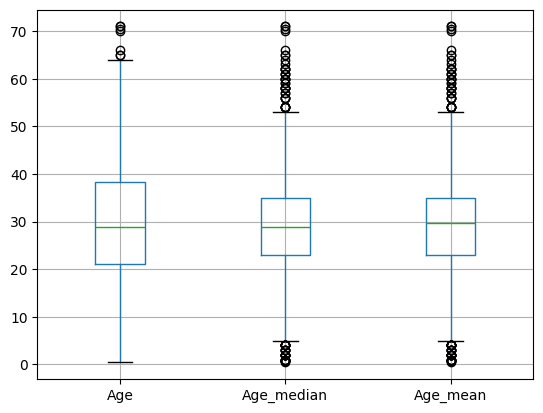

In [25]:
x_train[['Age','Age_median','Age_mean']].boxplot()
plt.show()

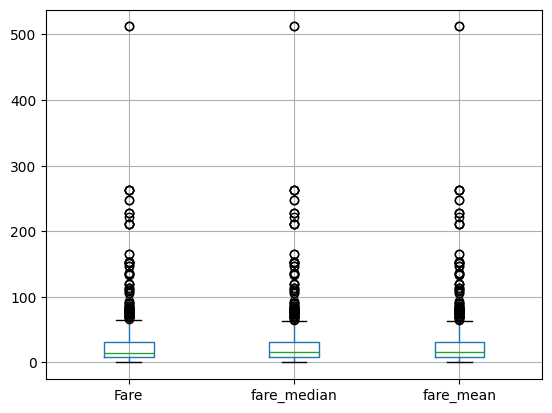

In [26]:
x_train[['Fare','fare_median','fare_mean']].boxplot()
plt.show()

# now we using the sklearn 

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [28]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [29]:
trf = ColumnTransformer([
    ('imputer1',imputer1,[0]),
    ('imputer2',imputer2,[1])
],remainder = 'passthrough')

In [30]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 [0]),
                                ('imputer2', SimpleImputer(), [1])])

In [33]:
trf.named_transformers_['imputer1'].statistics_
# here median of age 

array([28.75])

In [34]:
trf.named_transformers_['imputer2'].statistics_
# here we mean of fare 

array([32.61759689])

In [46]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)
# here now transform the data into inputer 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [47]:
print(x_train)
print()
print()
print(x_test)

[[ 40.      27.7208   0.    ]
 [  4.      16.7      2.    ]
 [ 47.       9.       0.    ]
 ...
 [ 71.      49.5042   0.    ]
 [ 28.75   221.7792   0.    ]
 [ 28.75    25.925    0.    ]]


[[ 42.          26.2875       0.        ]
 [ 21.           8.05         0.        ]
 [ 24.          65.           3.        ]
 [ 28.          56.4958       0.        ]
 [ 17.           7.925        6.        ]
 [ 30.           7.8958       0.        ]
 [ 80.          30.           0.        ]
 [ 25.           7.25         0.        ]
 [ 50.         133.65         2.        ]
 [ 25.          26.           1.        ]
 [ 35.          26.           0.        ]
 [ 35.          90.           1.        ]
 [ 55.          16.           0.        ]
 [ 28.75        56.4958       0.        ]
 [ 28.75        56.4958       0.        ]
 [ 19.           7.8542       1.        ]
 [ 28.75        15.2458       2.        ]
 [ 49.           0.           0.        ]
 [ 18.          32.61759689   1.        ]
 [ 65.        